<!-- <img src="./logo_UTN.svg" align="right" width="150" />  -->
<img src="Logo_UNSAM.png" align="right" width="150" />  -->
#### Análisis y Procesamiento Digital de Señales

# Tarea Semanal N°05
#### Montserrat Coto



## Introducción

En este trabajo se realiza el análisis espectral de tres señales reales: una señal de electrocardiograma (ECG), una señal de pletismografía (PPG) y una señal de audio correspondiente a la voz del docente. Todas ellas fueron previamente digitalizadas.

El objetivo principal de esta tarea es estimar la densidad espectral de potencia (PSD) de cada señal. Para esto, elegí hacerlo mediante el método de Welch, utilizando una ventana de Hann y normalización al pico (0 dB); lo cual permite comparar visualmente las formas espectrales incluso entre señales de distinta naturaleza, amplitud y niveles de ruido.

Además, se calcula el ancho de banda efectivo de cada señal. Para esta estimación, se normalizan las señales a potencia unitaria y se utiliza la transformada Fourier para obtener la distribución acumulada de energía en frecuencia. A partir de esta curva, se cuantifica el ancho de banda como la frecuencia máxima que acumula un determinado porcentaje de la energía total (en este caso, 95 % y 98 %).

Finalmente, se presenta una tabla comparativa con los anchos de banda estimados, lo que permite analizar y contrastar el comportamiento espectral de fenómenos de naturaleza biomédica (ECG y PPG) frente a uno de tipo acústico (voz).

# Desarollo

## A. Estimación de la densidad espectral de potencia (PSD)

##### Definición de Parámetros

In [4]:
import numpy as np
from scipy import signal as sig

import matplotlib.pyplot as plt
   
import scipy.io as sio
from scipy.io.wavfile import write

from scipy import signal
from scipy.fft import fft, fftshift

def vertical_flaten(a): #Llevan vectores planos  a columnas

    return a.reshape(a.shape[0],1)

Para el análisis de la densidad espectral de potencia (PSD), se aplican distintas normalizaciones según el objetivo. Dado que las señales son de distinta naturaleza, se utilizó la normalización al pico para facilitar la visualización relativa de los picos en dB respecto al máximo de cada señal. Esto permite identificar fácilmente las frecuencias dominantes sin que la escala de potencia absoluta afecte la comparación.

### Estimación de la densidad espectral de potencia (PSD) - ECG 

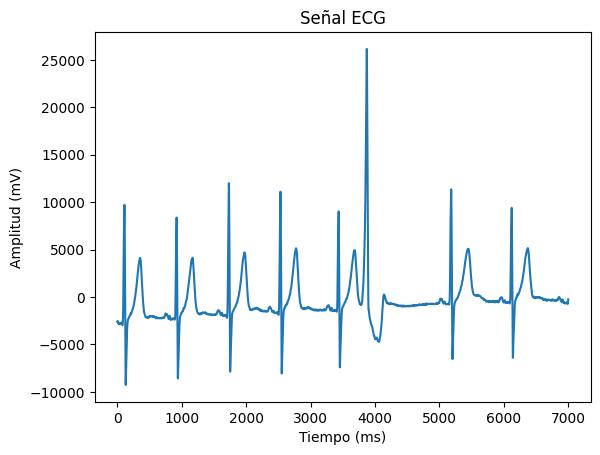

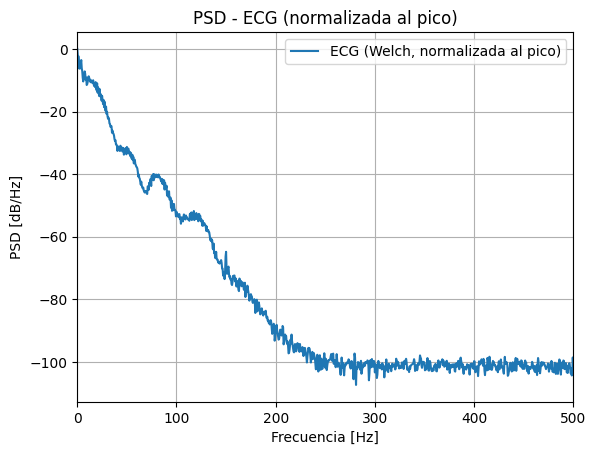

In [45]:
fs_ecg = 1000  # Hz
mat_struct = sio.loadmat('./ECG_TP4.mat')
ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])

# Usar solo las primeras 12000 muestras
ecg_one_lead = ecg_one_lead[:12000]
N_ecg = len(ecg_one_lead)

plt.figure()
plt.plot(ecg_one_lead[5000:12000])
plt.xlabel('Tiempo (ms)')   # 12000 muestras a 1000 Hz = 12 segundos, acá mostramos de 5000 a 12000 (7 segundos)
plt.ylabel('Amplitud (mV)')
plt.title('Señal ECG')

############
# 1. PSD con Welch (normalizada al pico en dB)
#############################

nperseg_ecg = int(N_ecg / 6)



ecg_f_welch, ecg_Pxx_welch = signal.welch(
    ecg_one_lead[:, 0],
    fs=fs_ecg,
    window='hann',
    nperseg=nperseg_ecg,
    noverlap=nperseg_ecg // 2,
    detrend=False,
    scaling='density'
)

# Normalización al pico (en dB)
ecg_Pxx_welch_db = 10 * np.log10(ecg_Pxx_welch)
ecg_Pxx_welch_db -= np.max(ecg_Pxx_welch_db)

# Gráfico PSD
plt.figure()
plt.plot(ecg_f_welch, ecg_Pxx_welch_db, label='ECG (Welch, normalizada al pico)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.title('PSD - ECG (normalizada al pico)')
plt.grid()
plt.xlim(0, fs_ecg / 2)
plt.legend()

### Estimación de la densidad espectral de potencia (PSD) - 

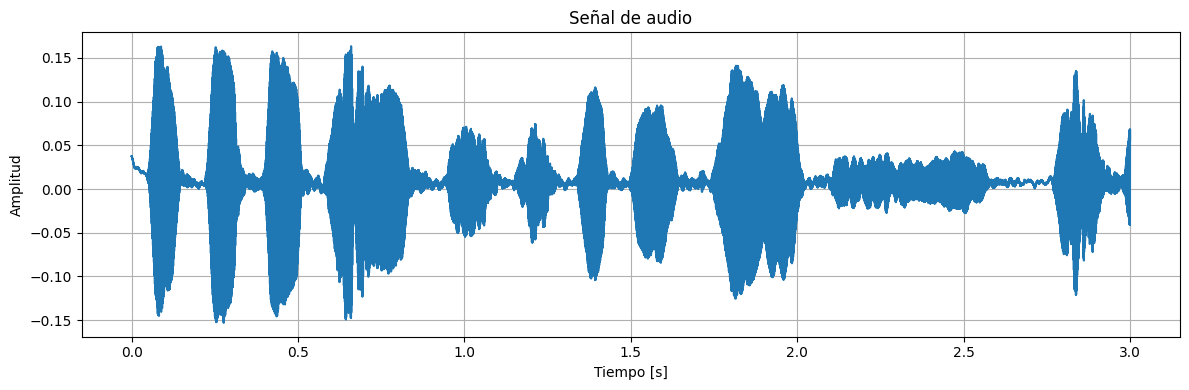

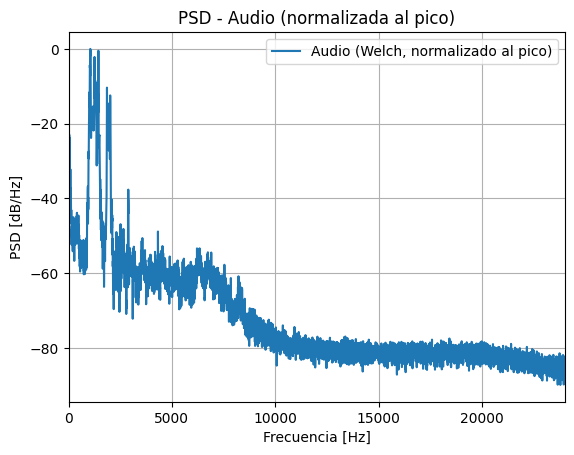

In [42]:
from scipy.io import wavfile

fs_audio, wav_data = wavfile.read('la cucaracha.wav')
#fs_audio, wav_data = wavfile.read('prueba psd.wav')
#fs_audio, wav_data = wavfile.read('silbido.wav')

# Tiempo para el eje x en segundos
N_audio = len(wav_data)
nperseg_audio = int(N_audio / 6)
t_audio = np.arange(N_audio) / fs_audio

plt.figure(figsize=(12, 4))
plt.plot(t_audio, wav_data, color='C0')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal de audio')
plt.grid()
plt.tight_layout()

# -----------------------
# 1.Estimación de la densidad espectral de potencia (PSD)
# -----------------------

# Cálculo de PSD con Welch
from scipy.signal import welch
N_audio = len(wav_data)
nperseg_audio = int(N_audio / 6)

# Welch (sin normalización de potencia)
f_welch, Pxx_welch = welch(
    wav_data,
    fs=fs_audio,
    window='hann',
    nperseg=nperseg_audio,
    noverlap=nperseg_audio // 2,
    detrend=False,
    scaling='density'
)

# Normalización al pico (dB)
Pxx_welch_db = 10 * np.log10(Pxx_welch)
Pxx_welch_db -= np.max(Pxx_welch_db)

# Gráfico
plt.figure()
plt.plot(f_welch, Pxx_welch_db, label='Audio (Welch, normalizado al pico)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.title('PSD - Audio (normalizada al pico)')
plt.grid()
plt.xlim(0, fs_audio / 2)
plt.legend()





### Estimación de la densidad espectral de potencia (PSD) - PPG

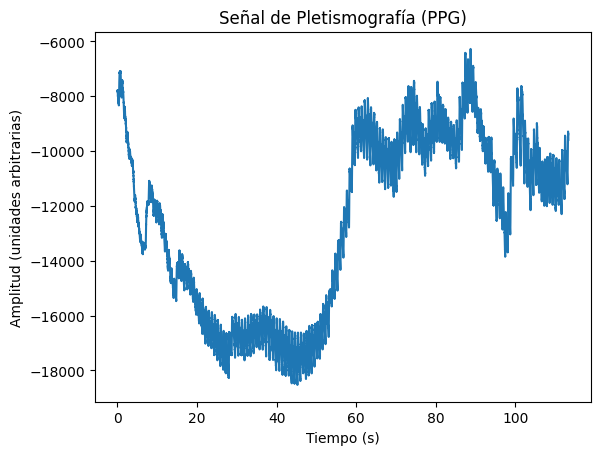

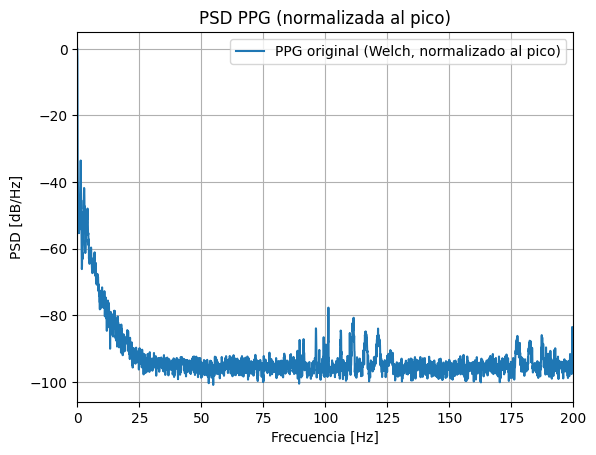

In [23]:
fs_ppg = 400 # Hz

# Cargar el archivo CSV como un array de NumPy
ppg = np.genfromtxt('PPG.csv', delimiter=',', skip_header=1)  # Omitir la cabecera si existe

N_ppg = len(ppg)

t = np.arange(len(ppg)) / fs_ppg
plt.figure()
plt.plot(t, ppg)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (unidades arbitrarias)')
plt.title('Señal de Pletismografía (PPG)')

# ---------------------------------
# 1. PSD con Welch normalizado al pico
# ---------------------------------

f_welch, Pxx_welch = signal.welch(ppg, fs=fs_ppg, window='hann',
                                  nperseg=int(N_ppg/6), noverlap=int(N_ppg/12),
                                  detrend=False, scaling='density')

Pxx_welch_db = 10 * np.log10(Pxx_welch)
Pxx_welch_db -= np.max(Pxx_welch_db)  # Normalizo al pico para PSD

plt.figure()
plt.plot(f_welch, Pxx_welch_db, label='PPG original (Welch, normalizado al pico)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.title('PSD PPG (normalizada al pico)')
plt.grid()
plt.xlim(0, fs_ppg/2)
plt.legend()

Para la correcta estimación de la señal, es fundamental que esta sea obtenida en condiciones controladas. En este caso, la señal de pletismografía se encuentra fuertemente contaminada por ruido, lo que dificulta su análisis. Por recomendación del docente, se decidió aplicar un filtrado para mejorar la calidad de la señal y facilitar la interpretación de su comportamiento.

Se seleccionó un filtro pasa banda Butterworth de cuarto orden para este propósito. Quiero destacar que, al momento de realizar el código, no se había explicado aún en clase cómo diseñar un filtro pasa banda, por lo que la implementación se realizo con ayuda de una búsqueda de internet.

El diseño del filtro consideró el rango típico de frecuencias presentes en una señal PPG, que está estrechamente relacionada con la pulsación cardíaca. La frecuencia cardíaca normal oscila entre 30 y 300 latidos por minuto, equivalente a un rango aproximado de 0.5 a 5 Hz. Por ello, se estableció una frecuencia de corte inferior en 0.3 Hz para eliminar componentes de muy baja frecuencia causadas por movimientos, respiración lenta o deriva en la señal. La frecuencia de corte superior se fijó en 10 Hz, con el objetivo de preservar las frecuencias relevantes del pulso, a la vez que se eliminan ruidos de alta frecuencia, interferencias y artefactos eléctricos.

A continuación, se presenta una comparación visual de la señal PPG antes y después del filtrado. Además, se muestra la densidad espectral de potencia (PSD) de ambas señales, donde se puede observar claramente la reducción del ruido y la concentración de la energía en la señal filtrada.

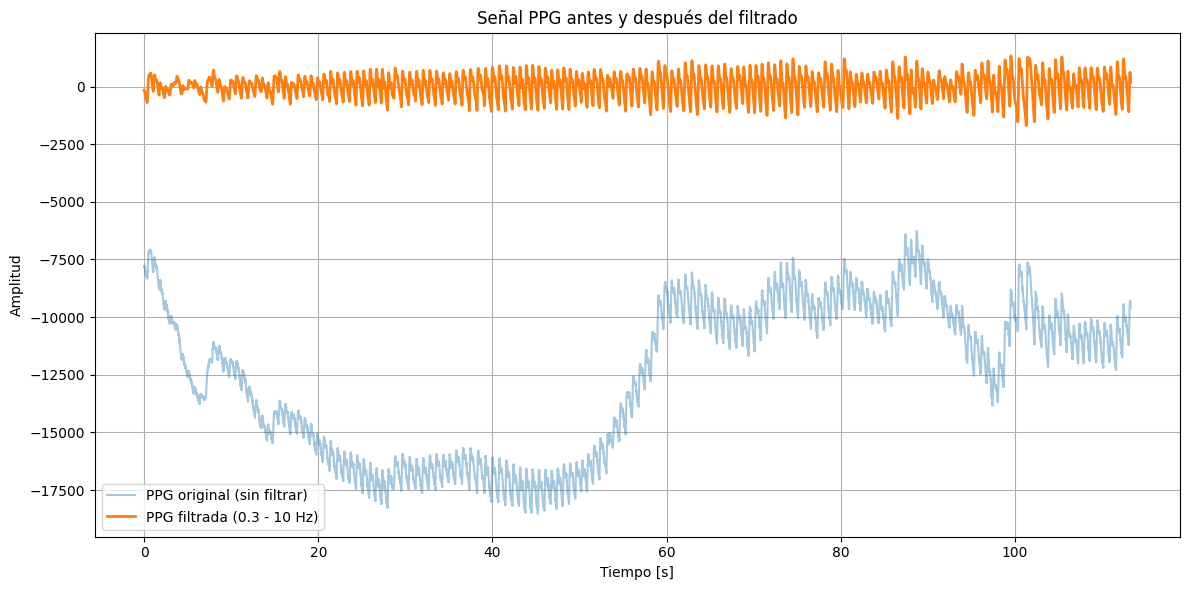

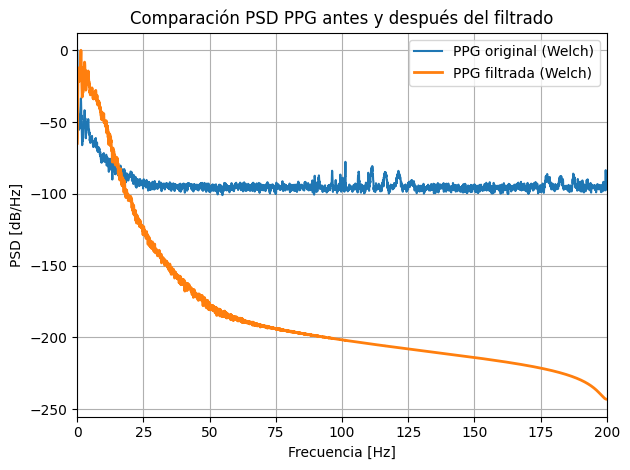

In [17]:
# ---------------------------------------
# Filtrado pasa banda Butterworth 4to orden (0.3 a 10 Hz)
# ---------------------------------------
f_low = 0.3
f_high = 10
nyq = fs_ppg / 2

b, a = signal.butter(4, [f_low / nyq, f_high / nyq], btype='bandpass')

#filtrado sobre la señal original, no normalizada
ppg_filtrada = signal.filtfilt(b, a, ppg)

t_ppg = np.arange(N_ppg) / fs_ppg

plt.figure(figsize=(12, 6))
plt.plot(t_ppg, ppg, alpha=0.4, label='PPG original (sin filtrar)')
plt.plot(t_ppg, ppg_filtrada, label='PPG filtrada (0.3 - 10 Hz)', linewidth=2)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal PPG antes y después del filtrado')
plt.legend()
plt.grid()
plt.tight_layout()

# PSD para señal filtrada (normalización al pico)
f_welch_filt, Pxx_welch_filt = signal.welch(ppg_filtrada, fs=fs_ppg, window='hann',
                                            nperseg=int(N_ppg/6), noverlap=int(N_ppg/12),
                                            detrend=False, scaling='density')

Pxx_welch_filt_db = 10 * np.log10(Pxx_welch_filt)
Pxx_welch_filt_db -= np.max(Pxx_welch_filt_db)

plt.figure()
plt.plot(f_welch, Pxx_welch_db, label='PPG original (Welch)')
plt.plot(f_welch_filt, Pxx_welch_filt_db, label='PPG filtrada (Welch)', linewidth=2)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.title('Comparación PSD PPG antes y después del filtrado')
plt.grid()
plt.xlim(0, fs_ppg/2)
plt.legend()
plt.tight_layout()

plt.show()

## 2. Estimación del ancho de banda de cada señal

Para el cálculo del ancho de banda (BW) mediante análisis de la transformada rápida de Fourier (FFT), se utiliza la normalización a potencia unitaria para garantizar que la suma total de la potencia espectral sea igual a uno. Esto permite interpretar la densidad espectral de potencia como una distribución de probabilidad de la energía a lo largo del espectro de frecuencias. De esta forma, el cálculo del ancho de banda al 95% o 98% representa el rango de frecuencias que concentra esa proporción de la energía total de la señal.

### Estimación del ancho de banda de cada señal - ECG

BW 95% ECG (FFT): 22.92 Hz
BW 98% ECG (FFT): 27.50 Hz


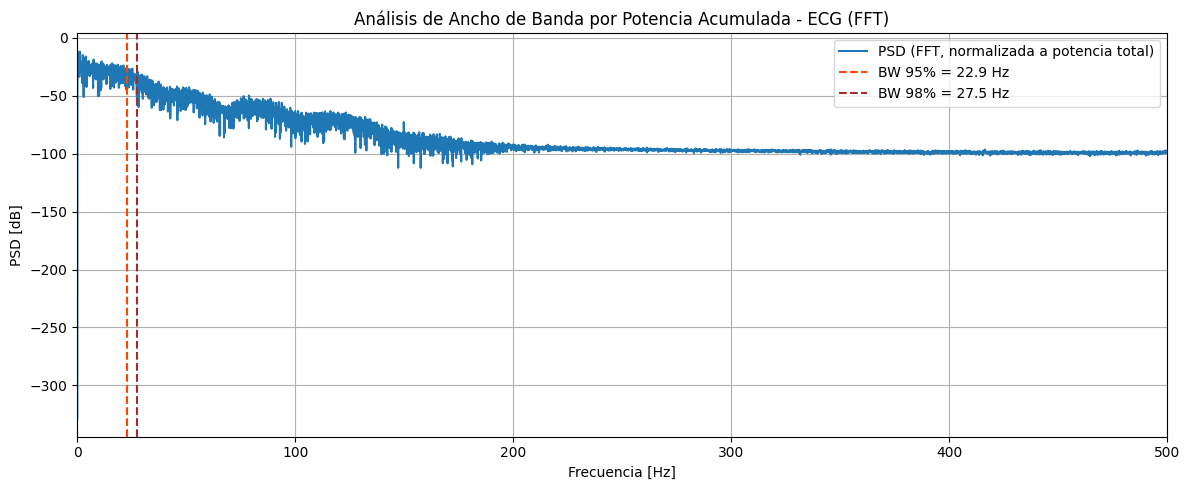

In [40]:
#############################
# 2. Análisis de BW con FFT directa (ECG)
#############################

# Normalización a potencia total 1 W
ecg_signal = ecg_one_lead[:, 0]
ecg_norm = ecg_signal / np.std(ecg_signal)

# Detrending (opcional)
ecg_detrended = ecg_norm - np.mean(ecg_norm)

# FFT directa y potencia
N_ecg = len(ecg_detrended)
fft_ecg = np.fft.rfft(ecg_detrended)
Pxx_fft_ecg = np.abs(fft_ecg) ** 2

# Frecuencia asociada
ff_ecg = np.fft.rfftfreq(N_ecg, 1/fs_ecg)

# Normalización a potencia unitaria
Pxx_ecg_norm = Pxx_fft_ecg / np.sum(Pxx_fft_ecg)

# Energía acumulada
Pxx_ecg_acum = np.cumsum(Pxx_ecg_norm)

# Cálculo de BW al 95% y 98%
i_95_ecg = np.where(Pxx_ecg_acum >= 0.95)[0][0]
i_98_ecg = np.where(Pxx_ecg_acum >= 0.98)[0][0]
BW_95_ecg = ff_ecg[i_95_ecg]
BW_98_ecg = ff_ecg[i_98_ecg]

print(f"BW 95% ECG (FFT): {BW_95_ecg:.2f} Hz")
print(f"BW 98% ECG (FFT): {BW_98_ecg:.2f} Hz")

# ---------------------------------
# Gráfico 1: PSD (FFT) con líneas de BW
# ---------------------------------
plt.figure(figsize=(12, 5))
plt.plot(ff_ecg, 10 * np.log10(Pxx_ecg_norm), lw=1.5, label='PSD (FFT, normalizada a potencia total)')
plt.axvline(BW_95_ecg, color='orangered', linestyle='--', label=f'BW 95% = {BW_95_ecg:.1f} Hz')
plt.axvline(BW_98_ecg, color='brown', linestyle='--', label=f'BW 98% = {BW_98_ecg:.1f} Hz')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.title('Análisis de Ancho de Banda por Potencia Acumulada - ECG (FFT)')
plt.grid()
plt.legend()
plt.xlim(0, fs_ecg / 2)
plt.tight_layout()


A continuación, se graficará la energía acumulada, que muestra cómo se va sumando progresivamente la potencia normalizada a lo largo del espectro de frecuencias. Esta curva permite visualizar directamente qué porcentaje de la energía total de la señal está contenido hasta cierta frecuencia.

Es útil para corroborar el cálculo del ancho de banda (BW), ya que los valores de BW al 95% y 98% se obtienen justamente encontrando las frecuencias en las cuales la energía acumulada alcanza esos umbrales.

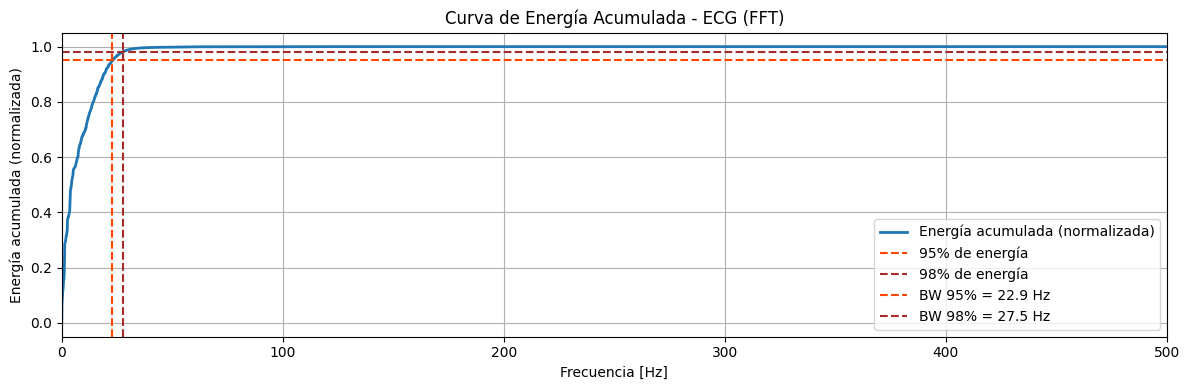

In [41]:
# ---------------------------------
# Gráfico 2: Energía acumulada (FFT)
# ---------------------------------
plt.figure(figsize=(12, 4))
plt.plot(ff_ecg, Pxx_ecg_acum, lw=2, label='Energía acumulada (normalizada)')
plt.axhline(0.95, color='orangered', linestyle='--', label='95% de energía')
plt.axhline(0.98, color='brown', linestyle='--', label='98% de energía')
plt.axvline(BW_95_ecg, color='orangered', linestyle='--', label=f'BW 95% = {BW_95_ecg:.1f} Hz')
plt.axvline(BW_98_ecg, color='brown', linestyle='--', label=f'BW 98% = {BW_98_ecg:.1f} Hz')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Energía acumulada (normalizada)')
plt.title('Curva de Energía Acumulada - ECG (FFT)')
plt.grid()
plt.legend()
plt.xlim(0, fs_ecg / 2)
plt.tight_layout()


### Estimación del ancho de banda de cada señal - Audio

Ancho de banda 95% (FFT): 1493.00 Hz
Ancho de banda 98% (FFT): 1977.67 Hz


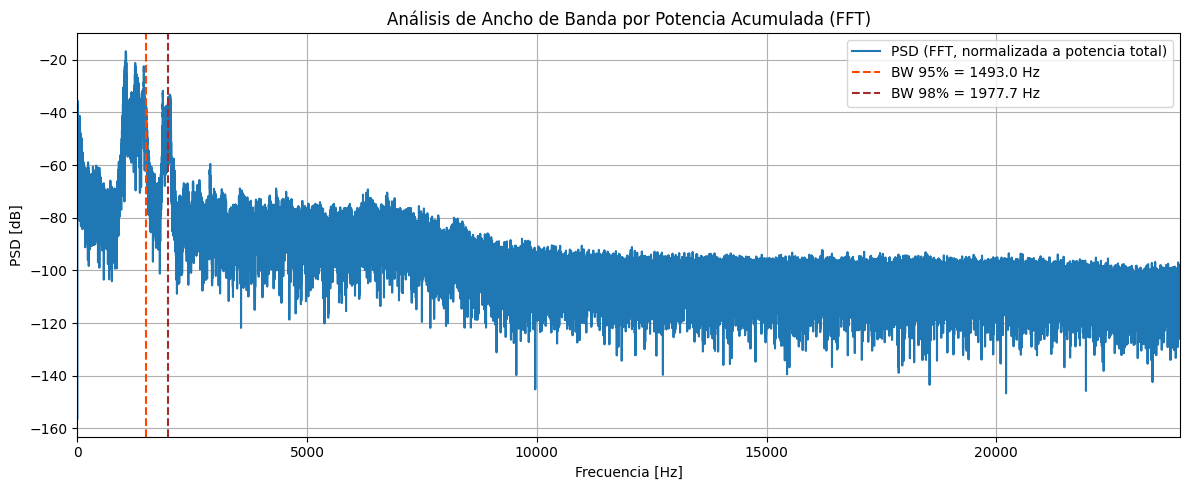

In [38]:
# ---------------------------------
# Cálculo del ancho de banda usando FFT (energía acumulada)
# ---------------------------------

# Normalización a potencia 1 W (quitando escala de amplitud)
wav_norm = wav_data / np.std(wav_data)

# Detrending (opcional si hay DC)
wav_detrended = wav_norm - np.mean(wav_norm)

# FFT y potencia
N = len(wav_detrended)
fft_wav = np.fft.rfft(wav_detrended)
Pxx_fft = np.abs(fft_wav) ** 2

# Frecuencias correspondientes
ff = np.fft.rfftfreq(N, 1/fs_audio)

# Normalización: potencia total unitaria
Pxx_norm = Pxx_fft / np.sum(Pxx_fft)

# Energía acumulada
Pxx_acumulada = np.cumsum(Pxx_norm)

# Índices donde se alcanza el 95% y 98% de la energía
i_95 = np.where(Pxx_acumulada >= 0.95)[0][0]
i_98 = np.where(Pxx_acumulada >= 0.98)[0][0]

# Frecuencias correspondientes
BW_95 = ff[i_95]
BW_98 = ff[i_98]

print(f"Ancho de banda 95% (FFT): {BW_95:.2f} Hz")
print(f"Ancho de banda 98% (FFT): {BW_98:.2f} Hz")

# ---------------------------------
# Gráfico 1: Potencia espectral (FFT) con líneas de BW
# ---------------------------------
plt.figure(figsize=(12, 5))
plt.plot(ff, 10 * np.log10(Pxx_norm), lw=1.5, label='PSD (FFT, normalizada a potencia total)')
plt.axvline(BW_95, color='orangered', linestyle='--', label=f'BW 95% = {BW_95:.1f} Hz')
plt.axvline(BW_98, color='brown', linestyle='--', label=f'BW 98% = {BW_98:.1f} Hz')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.title('Análisis de Ancho de Banda por Potencia Acumulada (FFT)')
plt.grid()
plt.legend()
plt.xlim(0, fs_audio / 2)
plt.tight_layout()


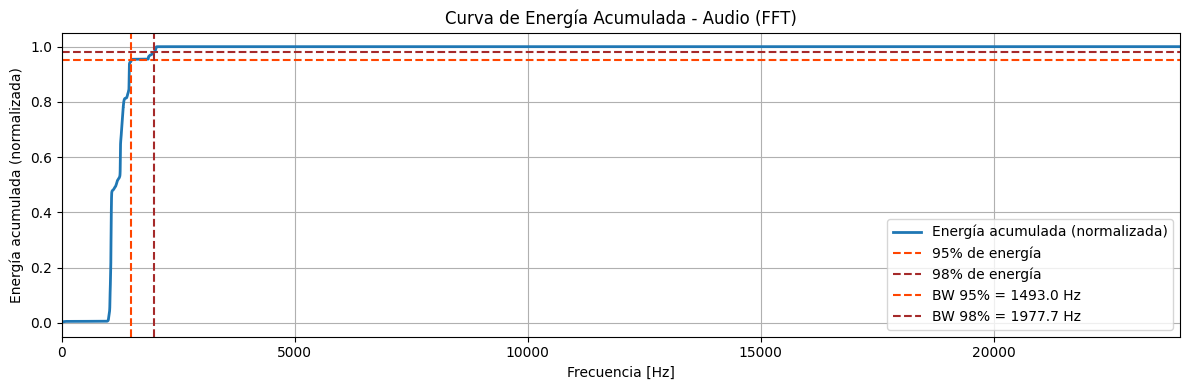

In [39]:
# ---------------------------------
# Gráfico 2: Energía acumulada (FFT)
# ---------------------------------
plt.figure(figsize=(12, 4))
plt.plot(ff, Pxx_acumulada, lw=2, label='Energía acumulada (normalizada)')
plt.axhline(0.95, color='orangered', linestyle='--', label='95% de energía')
plt.axhline(0.98, color='brown', linestyle='--', label='98% de energía')
plt.axvline(BW_95, color='orangered', linestyle='--', label=f'BW 95% = {BW_95:.1f} Hz')
plt.axvline(BW_98, color='brown', linestyle='--', label=f'BW 98% = {BW_98:.1f} Hz')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Energía acumulada (normalizada)')
plt.title('Curva de Energía Acumulada - Audio (FFT)')
plt.grid()
plt.legend()
plt.xlim(0, fs_audio / 2)
plt.tight_layout()

### Estimación del ancho de banda de cada señal - PPG

 Estimación del ancho de banda la PPG sin filtrar

Ancho de banda 95%: 0.10 Hz
Ancho de banda 98%: 1.26 Hz


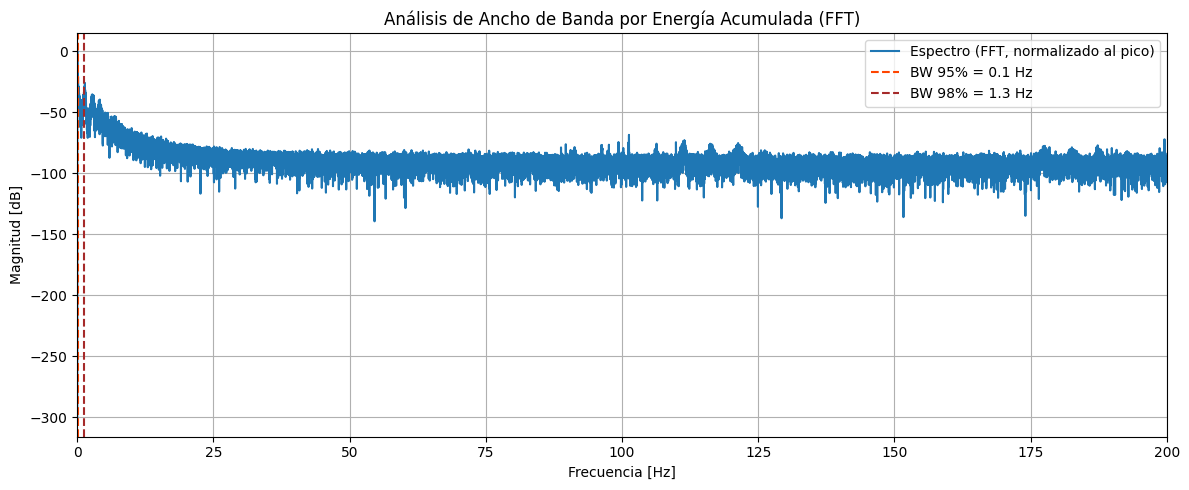

In [36]:
# ---------------------------------
# 2. Cálculo del ancho de banda usando FFT con normalización a potencia 1
# ---------------------------------

ppg_norm = ppg / np.std(ppg)
ppg_detrended = ppg_norm - np.mean(ppg_norm)  # Quitar componente DC

N = len(ppg_detrended)
fft_ppg = np.fft.rfft(ppg_detrended)
Pxx_fft = np.abs(fft_ppg)**2
ff = np.fft.rfftfreq(N, 1/fs_ppg)

# Normalización de potencia total a 1
Pxx_norm = Pxx_fft / np.sum(Pxx_fft)
Pxx_acumulada = np.cumsum(Pxx_norm)

# BW por energía acumulada
i_95 = np.where(Pxx_acumulada >= 0.95)[0][0]
i_98 = np.where(Pxx_acumulada >= 0.98)[0][0]
BW_95 = ff[i_95]
BW_98 = ff[i_98]

print(f"Ancho de banda 95%: {BW_95:.2f} Hz")
print(f"Ancho de banda 98%: {BW_98:.2f} Hz")

# Espectro FFT en dB normalizado al pico
Pxx_fft_db = 10 * np.log10(Pxx_fft / np.max(Pxx_fft))

# Gráfico del espectro FFT con líneas de BW
plt.figure(figsize=(12, 5))
plt.plot(ff, Pxx_fft_db, lw=1.5, label='Espectro (FFT, normalizado al pico)')
plt.axvline(BW_95, color='orangered', linestyle='--', label=f'BW 95% = {BW_95:.1f} Hz')
plt.axvline(BW_98, color='brown', linestyle='--', label=f'BW 98% = {BW_98:.1f} Hz')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Análisis de Ancho de Banda por Energía Acumulada (FFT)')
plt.grid()
plt.legend()
plt.xlim(0, fs_ppg / 2)
plt.tight_layout()

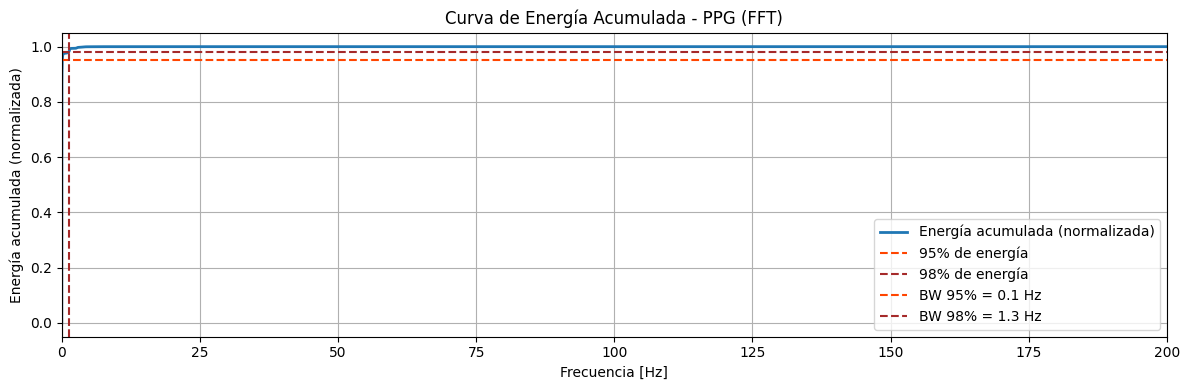

In [37]:
plt.figure(figsize=(12, 4))
plt.plot(ff, Pxx_acumulada, lw=2, label='Energía acumulada (normalizada)')
plt.axhline(0.95, color='orangered', linestyle='--', label='95% de energía')
plt.axhline(0.98, color='brown', linestyle='--', label='98% de energía')
plt.axvline(BW_95, color='orangered', linestyle='--', label=f'BW 95% = {BW_95:.1f} Hz')
plt.axvline(BW_98, color='brown', linestyle='--', label=f'BW 98% = {BW_98:.1f} Hz')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Energía acumulada (normalizada)')
plt.title('Curva de Energía Acumulada - PPG (FFT)')
plt.grid()
plt.legend()
plt.xlim(0, fs_ppg / 2)
plt.tight_layout()

 Estimación del ancho de banda la PPG filtrada

Ancho de banda (filtrada) 95%: 3.96 Hz
Ancho de banda (filtrada) 98%: 4.29 Hz


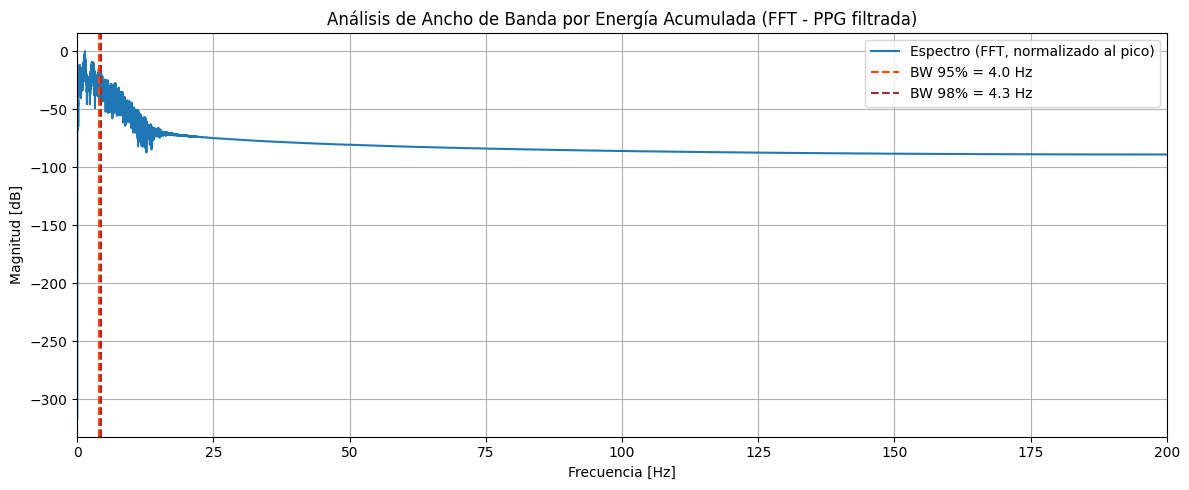

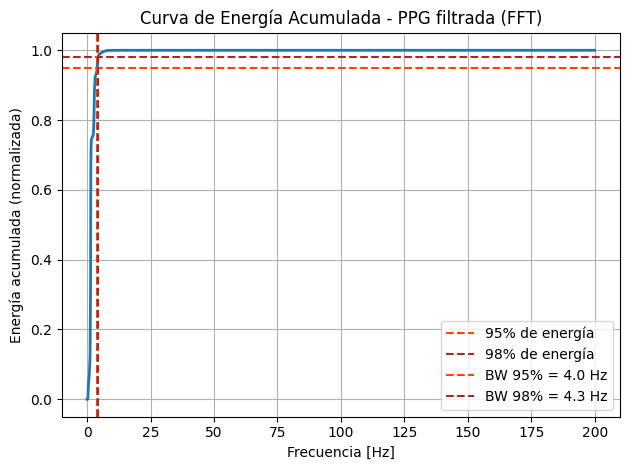

In [35]:
# -------------------------------
# 4. BW por energía acumulada - señal filtrada
# -------------------------------

# Normalizamos y quitamos DC
ppg_filt_norm = ppg_filtrada / np.std(ppg_filtrada)
ppg_filt_detrended = ppg_filt_norm - np.mean(ppg_filt_norm)

# FFT
N_filt = len(ppg_filt_detrended)
fft_ppg_filt = np.fft.rfft(ppg_filt_detrended)
Pxx_fft_filt = np.abs(fft_ppg_filt)**2
ff_filt = np.fft.rfftfreq(N_filt, 1/fs_ppg)

# Normalización de energía total a 1
Pxx_norm_filt = Pxx_fft_filt / np.sum(Pxx_fft_filt)
Pxx_acumulada_filt = np.cumsum(Pxx_norm_filt)

# Índices para BW 95% y 98%
i_95_filt = np.where(Pxx_acumulada_filt >= 0.95)[0][0]
i_98_filt = np.where(Pxx_acumulada_filt >= 0.98)[0][0]
BW_95_filt = ff_filt[i_95_filt]
BW_98_filt = ff_filt[i_98_filt]

print(f"Ancho de banda (filtrada) 95%: {BW_95_filt:.2f} Hz")
print(f"Ancho de banda (filtrada) 98%: {BW_98_filt:.2f} Hz")

# -------------------------------
# Gráfico: Espectro FFT con líneas de BW
# -------------------------------

Pxx_fft_db = 10 * np.log10(Pxx_fft_filt / np.max(Pxx_fft_filt))  # Normalizado al pico

plt.figure(figsize=(12, 5))
plt.plot(ff_filt, Pxx_fft_db, lw=1.5, label='Espectro (FFT, normalizado al pico)')
plt.axvline(BW_95_filt, color='orangered', linestyle='--', label=f'BW 95% = {BW_95_filt:.1f} Hz')
plt.axvline(BW_98_filt, color='brown', linestyle='--', label=f'BW 98% = {BW_98_filt:.1f} Hz')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Análisis de Ancho de Banda por Energía Acumulada (FFT - PPG filtrada)')
plt.grid()
plt.legend()
plt.xlim(0, fs_ppg / 2)
plt.tight_layout()

# -------------------------------
# Gráfico: Curva de energía acumulada
# -------------------------------

plt.figure()
plt.plot(ff_filt, Pxx_acumulada_filt, lw=2)
plt.axhline(0.95, color='orangered', linestyle='--', label='95% de energía')
plt.axhline(0.98, color='brown', linestyle='--', label='98% de energía')
plt.axvline(BW_95_filt, color='orangered', linestyle='--', label=f'BW 95% = {BW_95_filt:.1f} Hz')
plt.axvline(BW_98_filt, color='brown', linestyle='--', label=f'BW 98% = {BW_98_filt:.1f} Hz')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Energía acumulada (normalizada)')
plt.title('Curva de Energía Acumulada - PPG filtrada (FFT)')
plt.grid()
plt.legend()
plt.tight_layout()


### Datos observados

| Señal              | BW 95% [Hz] | BW 98% [Hz] |
|--------------------|-------------|-------------|
| Audio              | 1493.0      | 1977.7      |
| ECG                | 22.9        | 27.5        |
| PPG (filtrada)     | 4.0         | 4.3         |
| PPG (sin filtrar)  | 0.1         | 1.3         |


# Análisis  

# 1. Análisis de la PSD

Esta comparativa tiene sentido dado que normalizamos cada señal a su pico máximo. Si hubiéramos normalizado a potencia unitaria, la comparación habría sido mucho más difícil debido a la naturaleza tan distinta de cada señal.

- **Audio:**  
  La PSD del audio muestra un espectro muy amplio, con energía distribuida de manera continua hasta casi 2 kHz. Presenta múltiples picos que reflejan componentes armónicos, como se espera en una señal vocal. Es la señal con mayor dispersión en frecuencia.  

- **ECG:**  
  La PSD del ECG presenta picos marcados en frecuencias bajas, especialmente por debajo de los 30 Hz, posiblemente debido a ruido propio de los electrodos o del entorno de medición. Aun así, la señal refleja la naturaleza periódica del ciclo cardíaco.  

- **PPG (sin filtrar):**  
  La PSD muestra un pico pronunciado en las frecuencias más bajas, seguido de una caída abrupta y una estabilización en niveles muy bajos. Este comportamiento indica la presencia dominante de componentes de muy baja frecuencia, como drift, movimiento del sensor o artefactos respiratorios. En el dominio temporal, esto se manifiesta como una señal que carece de una forma de onda fisiológica clara. 

- **PPG (filtrada):**  
  Si se aplica un filtro pasa banda, desaparecen los componentes de baja frecuencia y la señal se centra en torno a cero. En la PSD se observa un espectro más acotado, con un pico bien definido en la zona correspondiente al ritmo cardíaco.

---

# 2. Comparación de Ancho de Banda (BW)

El análisis del ancho de banda acumulado (tanto para el 95% como para el 98% de la energía espectral) permite cuantificar qué tan ancha es cada señal en términos de contenido útil de frecuencia.

- El **audio** presenta el BW más alto, por mucha difrencia, requiriendo casi 2 kHz para contener el 98% de su energía. Esto se refleja claramente en su curva de energía acumulada, que crece de forma sostenida a lo largo de todo el eje de frecuencias.  

  > Debido a que la frecuencia máxima presente en la señal es aproximadamente 2 kHz, la frecuencia de muestreo debe ser al menos el doble para evitar el aliasing, según el teorema de Nyquist. Por eso, se recomienda una frecuencia de muestreo ideal de 4–5 kHz o más. Esto asegura que el espectro se capture correctamente sin superposiciones ni distorsiones.  

- En comparación, el **ECG** tiene un BW mucho más bajo, con su energía concentrada por debajo de los 30 Hz. En su curva de energía acumulada, se observa que la mayor parte de la energía se acumula rápidamente en ese tramo inicial y luego se estabiliza.  

  > Así, una frecuencia de muestreo de 100 Hz o más es suficiente para capturar la señal con fidelidad, ya que es más del doble de su frecuencia máxima relevante (~30 Hz). Esto permite reconstruir el ciclo cardíaco sin pérdida de información y evita aliasing.  

- La **PPG sin filtrar** presenta un BW extremadamente bajo, con la energía casi exclusivamente concentrada cerca de 0 Hz. Su curva de energía acumulada es prácticamente plana luego de los primeros Hz, indicando que el contenido espectral relevante es inexistente más allá de esa región.  

  > Este ancho de banda, 0.1 Hz a 1.3 Hz, refleja principalmente artefactos y drift, no contenido fisiológico real. Luego del filtrado, se recupera la señal cardíaca verdadera con un BW más definido y frecuencias relevantes para análisis.

- Por último, la **PPG filtrada** tiene un BW muy acotado (~4 Hz), lo cual es coherente con la frecuencia del pulso cardíaco en reposo. En la imagen de energía acumulada se observa una curva que crece rápidamente y se estabiliza temprano, indicando que casi toda la energía útil está en un rango estrecho.  

  > Por lo que, para alcanzar el 95% y 98% de la energía acumulada, el ancho de banda va aproximadamente de 4 Hz a 4.3 Hz. Por esto, una frecuencia de muestreo de 10 Hz o más es suficiente para captar esta señal correctamente, dado que es el doble (o más) de la frecuencia máxima importante (~4.3 Hz). Esto también contribuye a reducir el ruido.   




# Conclusión

Esta tarea me permitió aplicar de forma práctica varios conceptos clave relacionados con la estimación espectral y el análisis de señales de distintas naturaleza. En particular, la comparación entre señales tan distintas como el ECG, el PPG y el audio puso en evidencia la importancia de conocer la naturaleza de cada señal antes de decidir cómo procesarla, incluyendo aspectos como la normalización, el filtrado y la elección de parámetros  adecuados.

En el caso de la densidad espectral de potencia (PSD), quedó claro que no siempre conviene normalizar a potencia unitaria. En este caso, el objetivo era comparar la forma espectral de señales con escalas y características muy diferentes, por lo que se optó por una normalización al pico (0 dB). Esta elección permitió enfocarse en la distribución relativa de energía en frecuencia, sin que las diferencias absolutas de amplitud o potencia distorsionaran la comparación.

El análisis también mostró cuán determinantes son el contexto y el método de adquisición en el contenido espectral de una señal. La señal de audio fue relativamente limpia y presentó un espectro claro. En cambio, la señal de ECG incluyó componentes de baja frecuencia y un pico marcado en 50 Hz, atribuible probablemente a interferencias de la red eléctrica y a los sistemas de medición. En este tipo de señales, podría ser recomendable aplicar un filtro pasa bajos, o incluso un notch en 50 Hz, para eliminar el ruido y conservar la banda fisiológicamente relevante. La señal de PPG fue la más desafiante: no mostró una estructura clara hasta que fue filtrada. Esto sugiere una fuerte presencia de ruido o artefactos de medición, probablemente relacionados con el modo de adquisición y con el hecho de que las componentes útiles se encuentran en un rango muy bajo, estrechamente vinculado a la frecuencia cardíaca.

Para la estimación del ancho de banda, me resultó especialmente útil complementar el análisis de la PSD con la gráfica de potencia acumulada. Esto me permitió ver cómo se distribuye la energía a lo largo del espectro y me facilitó poder validar la identificación de los puntos donde se alcanza el 95% o el 98% de la energía total. En este contexto, sí fue necesario normalizar a potencia unitaria para que la comparación entre señales tuviera sentido y permitiera interpretar correctamente los rangos de frecuencia más significativos desde el punto de vista energético.

En lo personal, esta tarea me demandó considerablemente más tiempo que otras, tanto por la complejidad del código como por la necesidad de traducir conceptos teóricos en soluciones prácticas. Un ejemplo concreto fue el filtrado de la señal de PPG: lo implementé antes de que se abordara formalmente en clase el diseño de una plantilla de filtro pasa banda. Para poder avanzar, no solo tuve que investigar cómo escribir el código, sino también qué parámetros eran razonables para ese tipo de señal y cómo aplicarlos de forma coherente. Este proceso, aunque desafiante, me permitió afianzar conocimientos y ganar criterio en el uso de herramientas de análisis espectral y procesamiento de señales.

